<a href="https://colab.research.google.com/github/camyllalima/PDI-Exercicios/blob/main/PDI_Lista2_Q8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage import data
from  skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def detect_letter(imagem_path, template_path):
    """
    Função para detectar uma letra em uma imagem usando template matching.

    Parâmetros:
    imagem_path (str): Caminho para a imagem
    template_path (str): Caminho para a imagem do template da letra

    Retorna:
    tuple: (found, image_with_boxes)
    found (bool): True se a letra foi encontrada, False caso contrário
    image_with_boxes (numpy.ndarray): Imagem com retângulos marcando as detecções
    """

    # Carrega a imagem
    image = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Não foi possível carregar a imagem em {imagem_path}")

    # Pré-processamento
    image_blur = cv2.GaussianBlur(image, (3, 3), 0)
    _, image_thresh = cv2.threshold(image_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Carrega o template
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    if template is None:
        raise ValueError(f"Não foi possível carregar o template em {template_path}")

    _, template_thresh = cv2.threshold(template, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Aplica template matching
    res = cv2.matchTemplate(image_thresh, template_thresh, cv2.TM_CCOEFF_NORMED)
    threshold = 0.7
    loc = np.where(res >= threshold)

    # Verifica se encontrou alguma correspondência
    matches = list(zip(*loc[::-1]))
    found = len(matches) > 0

    # Desenha retângulos nas detecções
    image_with_boxes = image.copy()
    for pt in zip(*loc[::-1]):
        cv2.rectangle(image_with_boxes, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), 0, 2)

    return found, image_with_boxes

In [ ]:
# Carrega a imagens
book1_path = '/content/drive/MyDrive/Lista2_imagens/Book_1.png'
book2_path = '/content/drive/MyDrive/Lista2_imagens/Book_2.png'

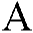

In [ ]:
# Carrega o template da letra A
template_path_A = '/content/drive/MyDrive/Lista2_imagens/Letra A.png'

# Mostra o template
cv2_imshow(cv2.imread(template_path_A, cv2.IMREAD_GRAYSCALE))

In [ ]:
# Chamando a função de detecção
book1found, book1_result = detect_letter(book1_path, template_path_A)
book2found, book2_result = detect_letter(book2_path, template_path_A)

print("Letra detectada em Book_1.png?", book1found)
print("Letra detectada em Book_2.png?", book2found)

Letra detectada em Book_1.png? True
Letra detectada em Book_2.png? False


In [ ]:
def show_result(encontrado, imagem):
    titulo = "Letra 'A' Detectada" if encontrado else "Letra 'A' NÃO Detectada"
    plt.imshow(imagem, cmap='gray')
    plt.title(titulo)
    plt.axis("off")
    plt.show()

Letra 'A' maiúscula detectada? True


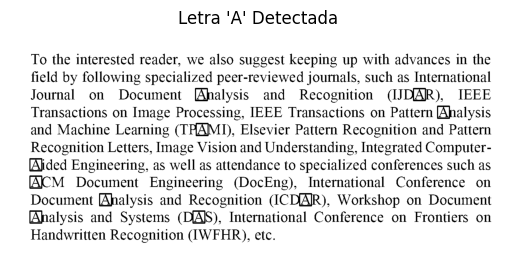

In [ ]:
print("Letra 'A' maiúscula detectada?", book1found)
show_result(book1found, book1_result)

Letra 'A' maiúscula detectada? False


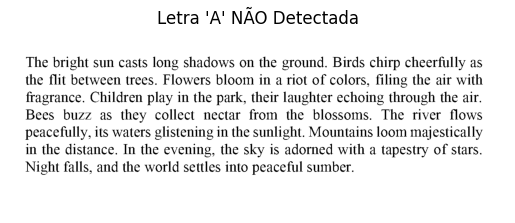

In [ ]:
print("Letra 'A' maiúscula detectada?", book2found)
show_result(book2found, book2_result)